# Classifying Fashion-MNIST
Let's try to build and train a neural network. We are going to use the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset.  
Fashion-MNIST is a dataset of 28x28 grayscale images of clothes. It is more complex than MNIST, so it gives a better representation of the performance of your network.

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
# After the first download we do not download it anymore, so we put False in the parameter @download@
trainset = datasets.FashionMNIST('.\\F_MNIST_data\\', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('.\\F_MNIST_data\\', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here, we can see some images.

Dimension of a batch: torch.Size([64, 1, 28, 28])


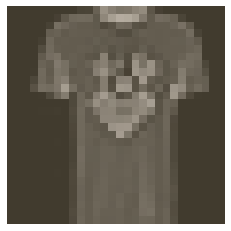

In [3]:
images, labels = next(iter(trainloader))
print(f"Dimension of a batch: {images.size()}")

# We use  the helper module which is done to make the images with original size
helper.imshow(images[0,:]);

## Building the Network
We have to include at least one hidden layer. We have 10 classes and we have to return the logits or the the log-softmax (scores) for the forward pass.

### Trivial Case of Building a Network (without a definition of a class)

In [97]:
from torch import nn, optim
model_trivial = nn.Sequential(nn.Linear(784,256),
                              nn.ReLU(),
                              nn.Linear(256,128),
                              nn.ReLU(),
                              nn.Linear(128,64),
                              nn.ReLU(),
                              nn.Linear(64,10))

# we do the forward pass
images, labels = next(iter(trainloader))
# flatten images in one batch
images = images.view(images.shape[0],-1)
print(images.shape)
logits = model_trivial(images)

# we obtain the logits for all the samples
print(logits.shape)



torch.Size([64, 784])
torch.Size([64, 10])


### "Normal" Case of Building a Network (by defining a class)
We create a class which defines our classifier. It inherits form `nn.Module`. Combined with `super().__init__()` it tracks the architecture and gives a lot of useful methods and attributes.  
We remember that in the definition of `__init__(self)` we have to put all the useful methods.  
Moreover, classes which inherits from `nn.Module` have to implement the `forward(self, x)` method where *x is expected to be a tensor*.

In [94]:
from torch import nn

# Another way to build our network is by defining a class which inherits from @nn.Module@
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential()
        self.seq.add_module("fc1", nn.Linear(784,256))
        self.seq.add_module("ReLU1", nn.ReLU())
        self.seq.add_module("fc2", nn.Linear(256,128))
        self.seq.add_module("ReLU2", nn.ReLU())
        self.seq.add_module("fc3", nn.Linear(128,64))
        self.seq.add_module("ReLU3", nn.ReLU())
        self.seq.add_module("fc4", nn.Linear(64,10))
        self.seq.add_module("ReLU4", nn.ReLU())

    def forward(self,x):
        # We can include in the forward pass the operation to flatten the images
        x.view(x.shape[0], -1)
        x = self.seq(x)

        return x

In [95]:
model_normal = Classifier()

In [96]:
model_normal

Classifier(
  (seq): Sequential(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (ReLU1): ReLU()
    (fc2): Linear(in_features=256, out_features=128, bias=True)
    (ReLU2): ReLU()
    (fc3): Linear(in_features=128, out_features=64, bias=True)
    (ReLU3): ReLU()
    (fc4): Linear(in_features=64, out_features=10, bias=True)
    (ReLU4): ReLU()
  )
)

We define:
- a criterion to compute the error
- an optimizer to update the weights
- the number of epochs (number of times in which we pass all the dataset)  
  
We can see that only by substituting the type of optimizer we obtain different performances: by substituting the [Stochasting Gradient Descent](https://pytorch.org/docs/stable/optim.html?highlight=torch%20optim%20sgd#torch.optim.SGD) optimizer to the [Adam](https://pytorch.org/docs/stable/optim.html?highlight=torch%20optim%20sgd#torch.optim.Adam) one.  
The `optim.Adam` optimization method is similar to the `optim.SGD`, but it is better because it has the momentum (parameter necessary not to make the training phase converging quicker) and it fits each parameter of the network as best as possible.

#### Usage of the Trivial Network

In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
    training_loss = 0.0
    # pass all the batches in the training set
    for images,labels in trainloader:
        # flatten all the images in a batch
        images = images.view(images.shape[0],-1)
        # forward pass
        logits = model_trivial(images)
        # we compute the loss
        loss = criterion(logits, labels)
        training_loss += loss.item()
        # we have to put to 0 the gradient each time we compute it
        optimizer.zero_grad()
        # we compute the backward
        loss.backward()
        # we update the parameters of the network
        optimizer.step()
    else:
        print(f"The training error per epoch: {training_loss/len(trainloader)}")

The training error per epoch: 2.30056447972621
The training error per epoch: 2.300554663387697
The training error per epoch: 2.3005659869993167
The training error per epoch: 2.300552937267686
The training error per epoch: 2.300548992685672


#### Usage of "Normal" Network

In [99]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
    training_loss = 0.0
    # pass all the batches in the training set
    for images,labels in trainloader:
        # flatten all the images in a batch
        images = images.view(images.shape[0],-1)
        # forward pass
        logits = model_normal.forward(images)
        # we compute the loss
        loss = criterion(logits, labels)
        training_loss += loss.item()
        # we have to put to 0 the gradient each time we compute it
        optimizer.zero_grad()
        # we compute the backward
        loss.backward()
        # we update the parameters of the network
        optimizer.step()
    else:
        print(f"The training error per epoch: {training_loss/len(trainloader)}")

The training error per epoch: 2.3028544591688145
The training error per epoch: 2.302858872200126
The training error per epoch: 2.30285521255119
The training error per epoch: 2.3028535685305402
The training error per epoch: 2.3028448487141495


Now, we use the trained model to see if the error is coherent with what we have by the classification.

tensor(10.2535, grad_fn=<SumBackward0>)
Sum of probabilities:  tensor(1., grad_fn=<SumBackward0>)
tensor([0.0828, 0.1073, 0.1228, 0.0893, 0.1000, 0.0934, 0.1127, 0.0953, 0.1121,
        0.0844], grad_fn=<DivBackward0>)


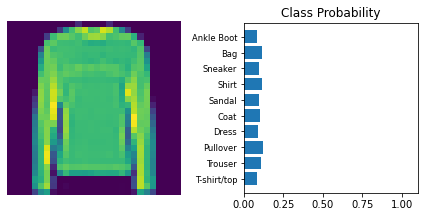

In [108]:
import helper
# We retrieve an image of the training set
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
logits = model(images[0])# We take always the first image in a batch
# From scores to probabilities thanks to SoftMax function
# The SoftMax function is necessary to normalize the scores/logits (to range them between 0 ad 1)
exp = torch.exp(logits)
ps = exp / torch.sum(exp)
print("Sum of probabilities: ", torch.sum(ps))
print(ps)
helper.view_classify(images[0],ps, version='Fashion')

Now, we see how the model performs on the test data.

sum of probabilities:  tensor(1., grad_fn=<SumBackward0>)
tensor([0.0776, 0.0993, 0.1337, 0.0897, 0.0930, 0.0994, 0.1162, 0.0953, 0.1136,
        0.0822], grad_fn=<DivBackward0>)


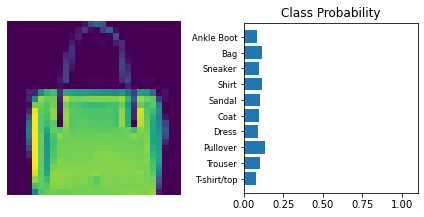

In [107]:
import helper
# We retrieve an image of the training set
images, labels = next(iter(testloader))
images = images.view(images.shape[0],-1)
logits = model(images[0])# We take always the first image in a batch
# From scores to probabilities thanks to SoftMax function
# The SoftMax function is necessary to normalize the scores/logits (to range them between 0 ad 1)
exp = torch.exp(logits)
ps = exp / torch.sum(exp)
print("Sum of probabilities: ", torch.sum(ps))
print(ps)
helper.view_classify(images[0],ps, version='Fashion')